<a href="https://colab.research.google.com/github/ppojawa/machine-learning-bootcamp/blob/main/unsupervised/04_anomaly_detection/03_anomaly_detection_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### prophet
Strona biblioteki: [https://facebook.github.io/prophet/](https://facebook.github.io/prophet/)  

Dokumentacja/User Guide: [https://facebook.github.io/prophet/docs/quick_start.html](https://facebook.github.io/prophet/docs/quick_start.html)

Biblioteka do pracy z szeregami czasowymi od Facebook'a

Aby zainstalować bibliotekę prophet, użyj polecenia poniżej:
```
!pip install fbprophet
```
Aby zaktualizować do najnowszej wersji użyj polecenia poniżej:
```
!pip install --upgrade fbprophet
```
Kurs stworzony w oparciu o wersję `0.5`

### Spis treści:
1. [Import bibliotek](#0)
2. [Załadowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Przygotowanie danych](#3)
5. [Prophet - budowa modelu](#4)
6. [Wizualizacja działania modelu](#5)
7. [Budowa modelu - wrzesień](#6)




In [1]:
!pip install prophet


### <a name='0'></a> Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import prophet as fbprophet

np.random.seed(41)
fbprophet.__version__

'1.1.5'

### <a name='1'></a> Załadowanie danych

In [2]:
df = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/traffic.csv',
                 parse_dates=['timestamp'])
df.head()

timestamp    count
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917
3 2018-09-25 14:04:00  177.798
4 2018-09-25 14:05:00  165.469

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14398 entries, 0 to 14397
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  14398 non-null  datetime64[ns]
 1   count      14398 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 225.1 KB


### <a name='2'></a> Wizualizacja danych

In [4]:
px.line(df, x='timestamp', y='count', title='Anomaly Detection - web traffic', width=950, height=500,
        template='plotly_dark', color_discrete_sequence=['#42f5d4'])

In [5]:
px.scatter(df, x='timestamp', y='count', title='Anomaly Detection - web traffic', width=950, height=500,
           template='plotly_dark', color_discrete_sequence=['#42f5d4'])

### <a name='3'></a> Przygotowanie danych

In [6]:
df.head(3)

timestamp    count
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917

In [7]:
data = df.copy()
data.columns = ['ds', 'y']
data.head(3)

ds        y
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917

Danymi wejściowymi do klasy Prophet jest obiekt DataFrame biblioteki pandas. Wejściowy DataFrame składa się z dwóch kolumn:
* ds (datestamp, odpowiednio sformatowana kolumna, np. YYYY-MM-DD dla daty, YYYY-MM-DD HH:MM:SS dla dokładnego czasu )
* y (kolumna numeryczna, reprezentująca wartość, którą chcemy przewidywać)


### <a name='4'></a> Prophet - budowa modelu

In [9]:
from prophet import Prophet

Prophet?

In [10]:
model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=False,
                interval_width=0.99, changepoint_range=0.8)

model.fit(data)
forecast = model.predict(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpavhd758i/3k4us12e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpavhd758i/2_3_277k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85917', 'data', 'file=/tmp/tmpavhd758i/3k4us12e.json', 'init=/tmp/tmpavhd758i/2_3_277k.json', 'output', 'file=/tmp/tmpavhd758i/prophet_modelejifz770/prophet_model-20231118214435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:44:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:44:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
forecast.head(3)

ds       trend  yhat_lower  yhat_upper  trend_lower  \
0 2018-09-25 14:01:00  111.442750  132.559332  187.331543   111.442750   
1 2018-09-25 14:02:00  111.444141  130.068977  191.579132   111.444141   
2 2018-09-25 14:03:00  111.445531  135.303541  185.745792   111.445531   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   111.442750       48.903206             48.903206             48.903206   
1   111.444141       48.968551             48.968551             48.968551   
2   111.445531       49.030361             49.030361             49.030361   

       daily  daily_lower  daily_upper  multiplicative_terms  \
0  48.903206    48.903206    48.903206                   0.0   
1  48.968551    48.968551    48.968551                   0.0   
2  49.030361    49.030361    49.030361                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                         0.0                         0.0  160.345956  
1                         0.0                         0.0  160.412691  
2                         0.0                         0.0  160.475892

In [12]:
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head(3)

ds       trend        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  111.442750  160.345956  132.559332  187.331543
1 2018-09-25 14:02:00  111.444141  160.412691  130.068977  191.579132
2 2018-09-25 14:03:00  111.445531  160.475892  135.303541  185.745792

In [13]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.head(3)

ds       trend  yhat_lower  yhat_upper  trend_lower  \
0 2018-09-25 14:01:00  111.442750  132.559332  187.331543   111.442750   
1 2018-09-25 14:02:00  111.444141  130.068977  191.579132   111.444141   
2 2018-09-25 14:03:00  111.445531  135.303541  185.745792   111.445531   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   111.442750       48.903206             48.903206             48.903206   
1   111.444141       48.968551             48.968551             48.968551   
2   111.445531       49.030361             49.030361             49.030361   

       daily  daily_lower  daily_upper  multiplicative_terms  \
0  48.903206    48.903206    48.903206                   0.0   
1  48.968551    48.968551    48.968551                   0.0   
2  49.030361    49.030361    49.030361                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  \
0                         0.0                         0.0  160.345956   
1                         0.0                         0.0  160.412691   
2                         0.0                         0.0  160.475892   

      real  anomaly  
0  182.478        1  
1  176.231        1  
2  183.917        1

### <a name='5'></a> Wizualizacja działania modelu

In [15]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl',
           title='Anomaly Detection in Time Series', template='plotly_dark', width=950, height=500)

In [16]:
future = model.make_future_dataframe(periods=1440, freq='Min')
future

ds
0     2018-09-25 14:01:00
1     2018-09-25 14:02:00
2     2018-09-25 14:03:00
3     2018-09-25 14:04:00
4     2018-09-25 14:05:00
...                   ...
15833 2018-10-06 13:54:00
15834 2018-10-06 13:55:00
15835 2018-10-06 13:56:00
15836 2018-10-06 13:57:00
15837 2018-10-06 13:58:00

[15838 rows x 1 columns]

In [17]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  160.345956  134.797977  186.392016
1 2018-09-25 14:02:00  160.412691  130.022327  189.723181
2 2018-09-25 14:03:00  160.475892  131.390243  187.339365
3 2018-09-25 14:04:00  160.535535  132.995679  188.132307
4 2018-09-25 14:05:00  160.591592  131.310659  189.525054

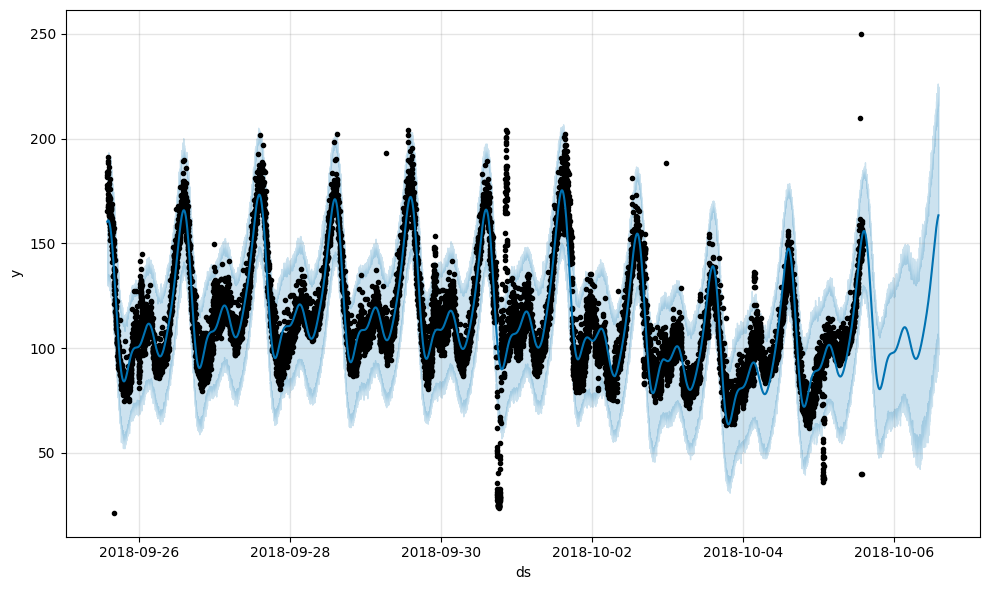

In [18]:
_ = model.plot(forecast)

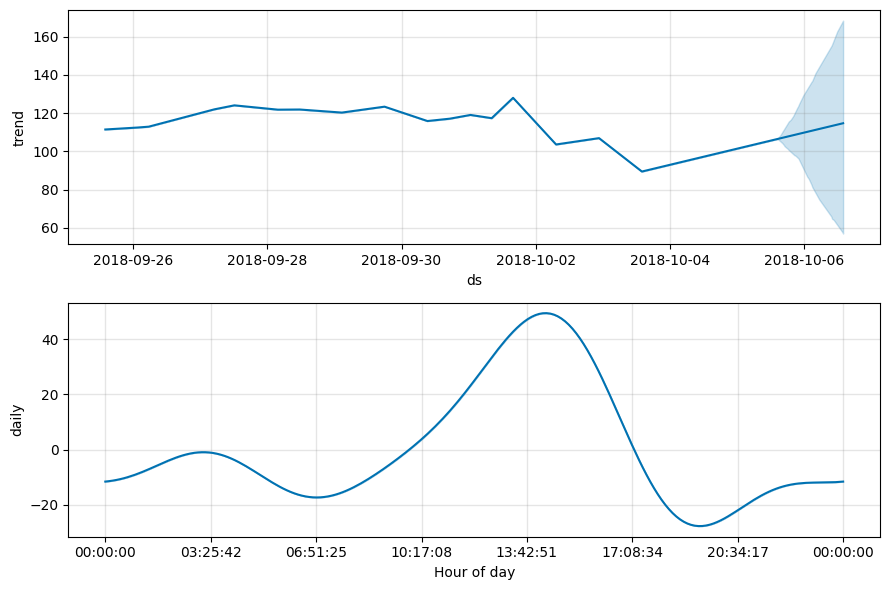

In [19]:
_ = model.plot_components(forecast)

In [31]:
from prophet.plot import plot_plotly

plot_plotly(model, forecast, xlabel='czas', ylabel='ruch webowy')

### <a name='6'></a> Budowa modelu - wrzesień

In [20]:
data_sep = df[df['timestamp'].dt.month == 9]
data_sep.columns = ['ds', 'y']
data_sep.head()

ds        y
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917
3 2018-09-25 14:04:00  177.798
4 2018-09-25 14:05:00  165.469

In [21]:
model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=False,
                seasonality_mode='multiplicative', interval_width=0.99, changepoint_range=0.8)

model.fit(data_sep)
forecast = model.predict(data_sep)
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head(3)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpavhd758i/drxxq82s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpavhd758i/aa6p_9sg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63029', 'data', 'file=/tmp/tmpavhd758i/drxxq82s.json', 'init=/tmp/tmpavhd758i/aa6p_9sg.json', 'output', 'file=/tmp/tmpavhd758i/prophet_modelf2ex2dfq/prophet_model-20231118215400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:54:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds       trend        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  115.268082  165.688793  133.566718  195.242952
1 2018-09-25 14:02:00  115.251736  165.715392  138.018238  200.242985
2 2018-09-25 14:03:00  115.235390  165.738080  136.131284  196.558561

In [23]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.head(3)

ds       trend  yhat_lower  yhat_upper  trend_lower  \
0 2018-09-25 14:01:00  115.268082  133.566718  195.242952   115.268082   
1 2018-09-25 14:02:00  115.251736  138.018238  200.242985   115.251736   
2 2018-09-25 14:03:00  115.235390  136.131284  196.558561   115.235390   

   trend_upper     daily  daily_lower  daily_upper  multiplicative_terms  \
0   115.268082  0.437421     0.437421     0.437421              0.437421   
1   115.251736  0.437856     0.437856     0.437856              0.437856   
2   115.235390  0.438257     0.438257     0.438257              0.438257   

   multiplicative_terms_lower  multiplicative_terms_upper  additive_terms  \
0                    0.437421                    0.437421             0.0   
1                    0.437856                    0.437856             0.0   
2                    0.438257                    0.438257             0.0   

   additive_terms_lower  additive_terms_upper        yhat     real  anomaly  
0                   0.0                   0.0  165.688793  182.478        1  
1                   0.0                   0.0  165.715392  176.231        1  
2                   0.0                   0.0  165.738080  183.917        1

In [24]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl',
           title='Anomaly Detection in Time Series - September', template='plotly_dark', width=950, height=500)

In [25]:
future = model.make_future_dataframe(periods=1440, freq='Min')
future

ds
0    2018-09-25 14:01:00
1    2018-09-25 14:02:00
2    2018-09-25 14:03:00
3    2018-09-25 14:04:00
4    2018-09-25 14:05:00
...                  ...
9234 2018-10-01 23:55:00
9235 2018-10-01 23:56:00
9236 2018-10-01 23:57:00
9237 2018-10-01 23:58:00
9238 2018-10-01 23:59:00

[9239 rows x 1 columns]

In [26]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  165.688793  135.631007  198.887157
1 2018-09-25 14:02:00  165.715392  130.910493  196.603750
2 2018-09-25 14:03:00  165.738080  133.383961  197.409650
3 2018-09-25 14:04:00  165.756837  138.261149  196.675794
4 2018-09-25 14:05:00  165.771640  138.331717  196.964761

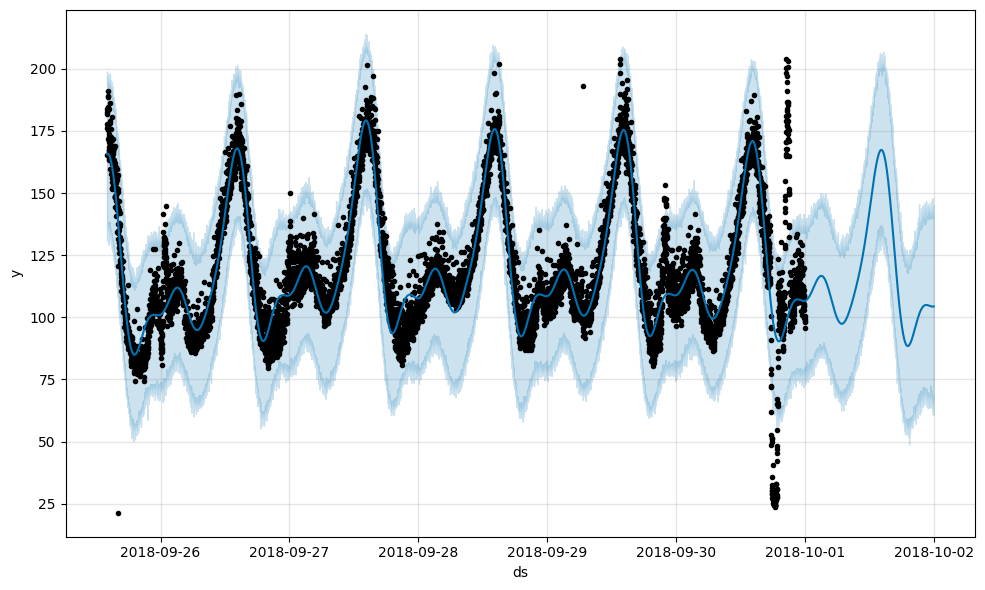

In [27]:
_ = model.plot(forecast)

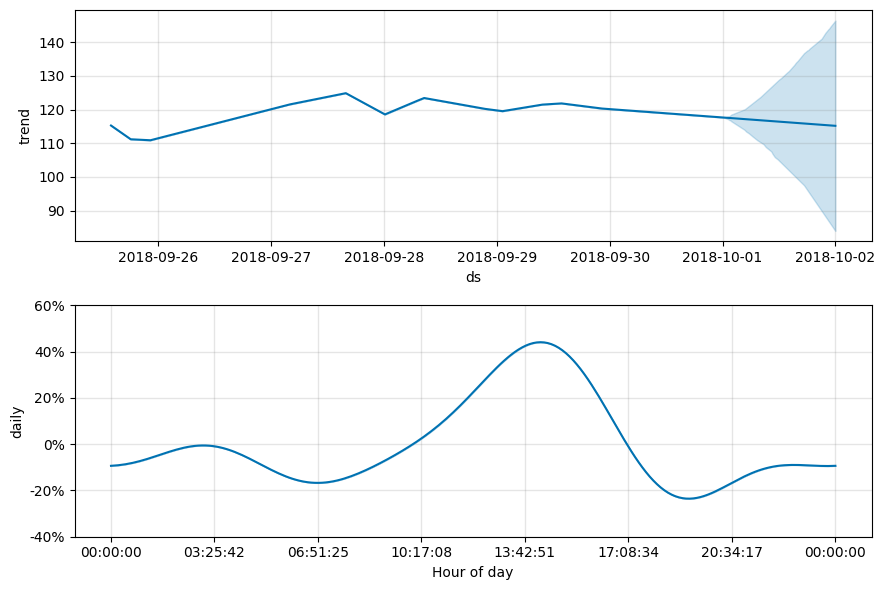

In [28]:
_ = model.plot_components(forecast)

In [32]:
plot_plotly(model, forecast, xlabel='czas', ylabel='ruch webowy')